In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [73]:
trainData = pd.read_csv('train.csv')
trainData.head(5)
#trainData.shape
#list(trainData.columns.values)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


C:\Users\124\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

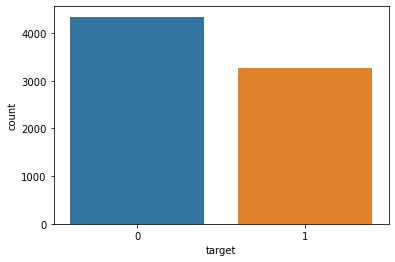

In [3]:
sns.countplot(trainData['target'])

In [74]:
trainData['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [75]:
#plt.figure(figsize=(15,40))
print(f'Unique Keyword num = {len(trainData.keyword.unique())})')
#print(f'Unique Keyword num = {len(testData.keyword.unique())})')


Unique Keyword num = 222)


In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [77]:
y=trainData['target'].values
x=trainData.drop(columns='target',axis=1)

In [78]:
trainData['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [79]:
trainData

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [80]:
import re

In [81]:
def clean(data):
    data = data.lower()
    data = re.sub('https?://\S+|www\.\S+', ' ', data)
    data = re.sub('\\W', ' ', data)
    data = re.sub('\n', ' ', data)
    data = re.sub(' +', ' ', data)
    data = re.sub('^ ', ' ', data)
    data = re.sub(' $', ' ', data)
    data = re.sub('#', ' ', data)
    data = re.sub('@', ' ', data)
    data = re.sub('[^a-zA-Z]',' ', data)
    data = data.replace('%20',' ')
    return data

In [82]:
for i in range(len(x)):
    x['text'][i] = clean(x['text'][i])


<ipython-input-82-55bbf694ca68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text'][i] = clean(x['text'][i])


In [83]:
x

,id,keyword,location,text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...
3,6,NaN,NaN,people receive wildfires evacuation ord...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...
...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,aria ahrary thetawniest the out of control wi...
7610,10871,NaN,NaN,m utc km s of volcano hawaii
7611,10872,NaN,NaN,police investigating after an e bike collided ...


In [84]:
newList=[]
lemmatizer = WordNetLemmatizer()
for i in range(len(x)):
    words = nltk.word_tokenize(x['text'][i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x['text'][i] = ' '.join(words)
    #x['text'][i] =  re.sub(r"[^a-zA-Z]+", ' ', x['text'][i])
    #x['text'][i] =  x['text'][i].lower()
    
        

<ipython-input-84-02c194368ac6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['text'][i] = ' '.join(words)


In [85]:
x.head(520)

,id,keyword,location,text
0,1,NaN,NaN,deed reason earthquake may allah forgive u
1,4,NaN,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,resident asked shelter place notified officer ...
3,6,NaN,NaN,people receive wildfire evacuation order calif...
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...
515,744,attacked,in Dimitri's arms,mageavexis lt thing get attacked
516,745,attacked,"Oslo, Norway",christian attacked muslim temple mount waving ...
517,746,avalanche,Los Angeles,welovela nhlducks avalanche defense match v st...
518,748,avalanche,"Loughton, Essex, UK",liked youtube video kalle mattson avalanche of...


In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, stratify=y)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train, test_size = 0.3, stratify=y_train)
#X_train

In [87]:
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)

(3730, 4) (3730,)
(1599, 4) (1599,)
(2284, 4) (2284,)


In [18]:
vectorizer = CountVectorizer(max_df=10,ngram_range=(1,4),max_features=50000)
vectorizer.fit(X_train['text'].values)
X_train_text = vectorizer.transform(X_train['text'].values)
#X_temp = np.array(X_train_text)

X_cv_text = vectorizer.transform(X_cv['text'].values)
X_test_text = vectorizer.transform(X_test['text'].values)

In [19]:
print(X_train_text.shape,y_train.shape)
print(X_cv_text.shape,y_cv.shape)
print(X_test_text.shape,y_test.shape)


(3730, 50000) (3730,)
(1599, 50000) (1599,)
(2284, 50000) (2284,)


# LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_train_text, y_train)

In [32]:
prediction = clf.predict(X_train_text)
prediction

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [50]:
prediction.shape

(3730,)

In [53]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[2120,    7],
       [ 103, 1500]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9705093833780161

In [57]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_test_text, y_test)

In [58]:
predictionTest = clf.predict(X_test_text)
predictionTest

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,predictionTest)
confusion

array([[1293,   10],
       [ 177,  804]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictionTest)
accuracy

0.9181260945709282

In [61]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_cv_text, y_cv)

In [63]:
predictioncv = clf.predict(X_cv_text)
predictioncv

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_cv,predictioncv)
confusion

array([[906,   6],
       [100, 587]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_cv,predictioncv)
accuracy

0.9337085678549093

# Naive bayes

In [88]:
from sklearn.naive_bayes import MultinomialNB
disaster = MultinomialNB().fit(X_train_text, y_train)

In [89]:
y_pred = disaster.predict(X_test_text)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[886, 417],
       [664, 317]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.526707530647986